<a href="https://colab.research.google.com/github/ramendrasingla/data_analysis_tutorial/blob/main/SQL_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from IPython.display import Image

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

In [3]:
# DATABASE AND TABLE SETUP
import pandas as pd
import sqlite3

# Connecting to the geeks database
connection = sqlite3.connect('ns.db')

avocado_df = pd.read_csv('/content/drive/MyDrive/Newton School/SQL/avocado - avocado.csv')
region_df = pd.read_csv('/content/drive/MyDrive/Newton School/SQL/avocado - region.csv')
type_df = pd.read_csv('/content/drive/MyDrive/Newton School/SQL/avocado - type.csv')
print(avocado_df.to_sql('avocado', connection, if_exists='replace', index=False))
print(region_df.to_sql('region', connection, if_exists='replace', index=False))
print(type_df.to_sql('type', connection, if_exists='replace', index=False))

18249
54
2


In [4]:
def execute_query(query):
  
  try:
    df = pd.read_sql_query(query, connection)
    return df
  except:
    return None

# Part - 1

## SQL - Structured Query Language
* Standard language for storing, manipulating, and retrieving data in databases
* Structured Query Language (SQL) is a programming language used to manage relational databases. Databases store information and then allow this information to be accessed and manipulated.


> * SQL can execute queries against a database 
> * SQL can retrieve data from a database 
> * SQL can insert records into a database 
> * SQL can update records in a database 
> * SQL can delete records from a database 
> * SQL can create new databases 
> * SQL can create new tables in a database 
> * SQL can create views in a database 
> * SQL can set permissions on tables, procedures, and views 

### Relational Database

A relational database organizes information into tables. The structure of a relational database is similar to that of an Excel spreadsheet. The tables in a database can be thought of like individual sheets within one big Excel file, which would be the database. Each table contains data which is organized into columns and rows. Each column holds a particular type of value.

For example, if we had a table of information about pets, it could have columns for a pet's name, species, and age. The table would also have an id column. This is a very important column that should appear in every table. Each row in a table has an id which identifies that piece of information and can be used to extract data from this row for use.

### Database Schema

* A database schema is a **blueprint** or **architecture** of how our data will look. It doesn't hold data itself, but instead describes the shape of the data and how it might relate to other tables or models. A sample of data at any given point in time represents a database instance. It will contain all of the properties described in the schema.

* A database schema will include:

> 1. Consistent formatting for all data entries
> 2. Unique keys for all entries and database objects
> 3. Each column in a table has a name and data type

### SELECT

Select command is used to execute the data in a table or a database. It helps in accessing single or multiple rows

In [ ]:
query = """
SELECT *
FROM AVOCADO
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,1,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,1,2
2,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,1,3
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,1,4
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,1,5
...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.04,14503.47,78.95,148.37,0.00,2,50
18245,2018-03-25,1.41,10028.49,138.15,773.22,0.00,2,51
18246,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,2,52
18247,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,2,53


### CREATE

The  ​CREATE TABLE​  statement is used to create a new table in a database.

```
CREATE TABLE table_name (
  column1 datatype,
  column2 datatype,
  column3 datatype,
  ...
)
```



In [ ]:
query = """
CREATE TABLE Persons (
  PersonID int,
  FirstName varchar(50),
  LastName varchar(50),
  Address varchar(255),
  City varchar(50)
)
"""
execute_query(query)
execute_query("SELECT * FROM Persons")

,PersonID,FirstName,LastName,Address,City


### INSERT

Insert records into a database table


```
INSERT INTO table_name (column_name_1, column_name_2, column_name_3)
VALUES (value_1, value_2, value_3);
```



In [ ]:
query = """
INSERT INTO Persons (PersonID, FirstName, LastName, City)
VALUES (2, 'C', 'D', 'CityC');
"""
execute_query(query)
execute_query("SELECT * FROM Persons")

,PersonID,FirstName,LastName,Address,City
0,1,A,B,qwer,CityA
1,2,C,D,None,CityC


### ALTER TABLE

Altering certain aspects of the table


```
ALTER TABLE table_name
```


In [ ]:
query = """
ALTER TABLE Persons
ADD COLUMN Country;
"""
execute_query(query)
execute_query("SELECT * FROM Persons")

,PersonID,FirstName,LastName,Address,City,Country
0,1,A,B,qwer,CityA,None
1,2,C,D,None,CityC,None


In [ ]:
# query = """
# ALTER TABLE Persons
# MODIFY COLUMN FirstName varchar(100);
# """
# execute_query(query)
# execute_query("SELECT * FROM Persons")

,PersonID,FirstName,LastName,Address,City


### DROP TABLE

Dropping the table from database


```
DROP TABLE table_name
```


In [ ]:
query = """
DROP TABLE Persons;
"""
execute_query(query)
execute_query("SELECT * FROM Persons")

### Constraints

* Constraints can be added to columns and can be used to add information about the data that can be housed in a column or how a column can behave. This is done while creating a new table. Constraints are added to columns after their data type is specified. A constraint can cause a database to reject data that does not meet the constraint. We could place constraints on the pets table using the following statement.

In [ ]:
query = """
CREATE TABLE pets (
id INTEGER PRIMARY KEY,
name TEXT,
species TEXT DEFAULT 'Dog',
age INTEGER NOT NULL
);
"""
execute_query(query)
execute_query("SELECT * FROM pets")

,id,name,species,age


# Part - 2

In [ ]:
query = """
SELECT *
FROM REGION
LIMIT 5
"""
execute_query(query)

,regionid,region
0,1,Albany
1,2,Atlanta
2,3,BaltimoreWashington
3,4,Boise
4,5,Boston


In [ ]:
query = """
SELECT *
FROM TYPE
LIMIT 5
"""
execute_query(query)

,typeid,type
0,1,conventional
1,2,organic


## SQL Keywords for String

In [ ]:
query = """
SELECT UPPER(Region) AS UPPER_REGION
FROM REGION
LIMIT 5
"""
execute_query(query)

,UPPER_REGION
0,ALBANY
1,ATLANTA
2,BALTIMOREWASHINGTON
3,BOISE
4,BOSTON


In [ ]:
query = """
SELECT LOWER(Region) AS LOWER_REGION
FROM REGION
LIMIT 5
"""
execute_query(query)

,LOWER_REGION
0,albany
1,atlanta
2,baltimorewashington
3,boise
4,boston


In [ ]:
### SUBSTR(column_name, start_idx, length)
query = """
SELECT SUBSTR(Region, -3, 3) AS SUBSTR_REGION
FROM REGION
LIMIT 5
"""
execute_query(query)

,SUBSTR_REGION
0,any
1,nta
2,ton
3,ise
4,ton


In [ ]:
# LTRIM, RTRIM, TRIM
query = """
SELECT TRIM(Region) AS TRIME_REGION
FROM REGION
LIMIT 5
"""
execute_query(query)

,TRIME_REGION
0,Albany
1,Atlanta
2,BaltimoreWashington
3,Boise
4,Boston


## SQL Keyword for Date

In [ ]:
query = """
SELECT DATE(), strftime('%d', DATE()) as "Day";
"""
execute_query(query)

,DATE(),Day
0,2023-06-10,10


In [ ]:
query = """
SELECT date , strftime('%Y-%m-%d', date) as "changed_date", strftime('%Y', date) as "Year",
strftime('%m', date) as "Month",
strftime('%d', date) as "Day"
FROM AVOCADO
"""
execute_query(query)

,date,changed_date,Year,Month,Day
0,2015-01-04,2015-01-04,2015,01,04
1,2015-01-04,2015-01-04,2015,01,04
2,2015-01-04,2015-01-04,2015,01,04
3,2015-01-04,2015-01-04,2015,01,04
4,2015-01-04,2015-01-04,2015,01,04
...,...,...,...,...,...
18244,2018-03-25,2018-03-25,2018,03,25
18245,2018-03-25,2018-03-25,2018,03,25
18246,2018-03-25,2018-03-25,2018,03,25
18247,2018-03-25,2018-03-25,2018,03,25


## Useful SQL Keywords

In [ ]:
query = """
SELECT DISTINCT regionid AS unique_regionid
FROM AVOCADO
LIMIT 5
"""
execute_query(query)

,unique_regionid
0,1
1,2
2,3
3,4
4,5


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE totalvol >= 50000000
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2016-02-07,0.76,52288697.89,16573573.78,20470572.61,2546439.11,1,52
1,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,1,52
2,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,1,52


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE totalvol < 500
ORDER BY avo_a DESC
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2016-10-02,1.49,472.82,10.50,18.99,0.0,2,25
1,2016-10-30,1.58,385.55,8.13,47.42,0.0,2,25
2,2015-11-08,1.59,84.56,3.95,3.95,0.0,2,25
3,2015-01-04,1.73,379.82,0.00,59.82,0.0,2,6
4,2015-07-12,2.05,419.98,0.00,63.42,0.0,2,50
5,2015-07-19,2.07,482.26,0.00,75.74,0.0,2,50


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE avgprice = 1.22
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,1,1
1,2015-01-04,1.22,8938.32,7009.77,671.88,0.00,2,19
2,2015-01-11,1.22,26008.88,12258.26,7094.53,490.24,2,3
3,2015-01-11,1.22,43116.44,18893.87,19745.21,0.00,2,37
4,2015-01-18,1.22,204504.99,48613.54,55881.05,39543.93,1,38
...,...,...,...,...,...,...,...,...
162,2018-03-04,1.22,91070.80,44454.46,1835.89,10101.52,1,4
163,2018-03-04,1.22,5318554.52,364721.28,3542626.10,6184.77,1,30
164,2018-03-11,1.22,3953699.57,741349.12,1112605.39,380229.80,1,16
165,2018-03-11,1.22,279645.04,65731.37,115236.06,174.48,1,17


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE avgprice != 1.22
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,1,2
1,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,1,3
2,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,1,4
3,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,1,5
4,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,1,6
...,...,...,...,...,...,...,...,...
18077,2018-03-25,1.04,14503.47,78.95,148.37,0.00,2,50
18078,2018-03-25,1.41,10028.49,138.15,773.22,0.00,2,51
18079,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,2,52
18080,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,2,53


## SQL Operators

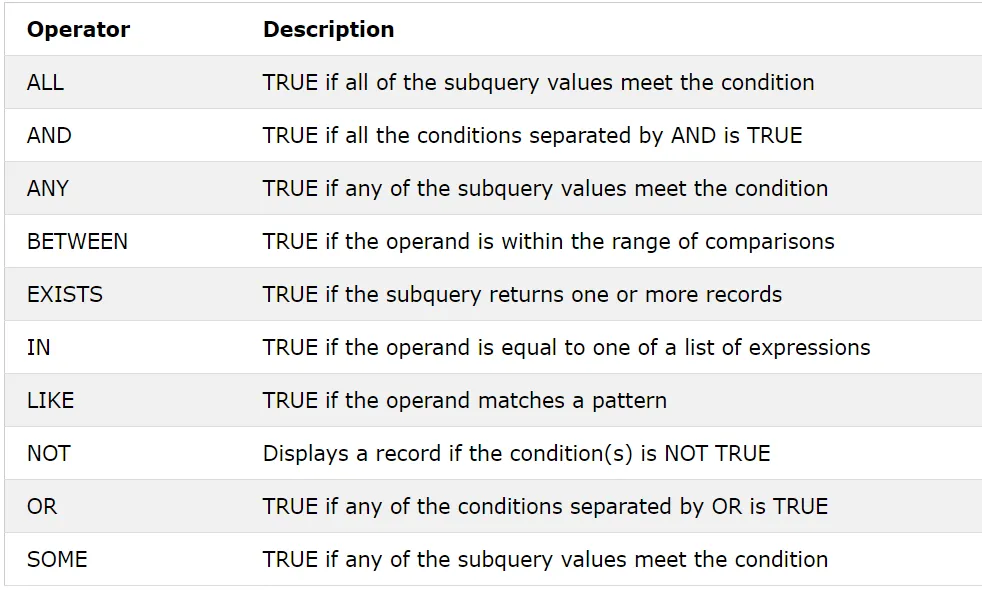

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/SQL/sql_operators.png')

In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE avo_a > 500000 AND avo_a < 700000
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,1,12
1,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,1,19
2,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,1,26
3,2015-01-11,0.76,1128693.04,680572.11,348535.22,11900.83,1,12
4,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,1,26
...,...,...,...,...,...,...,...,...
568,2018-03-11,1.19,888615.09,603091.72,74717.78,2009.90,1,25
569,2018-03-18,0.87,1362250.25,656842.99,247599.72,4978.69,1,12
570,2018-03-18,0.79,1243926.96,630826.45,184825.84,4011.21,1,19
571,2018-03-18,1.17,828837.57,575923.20,70118.84,2101.12,1,25


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE avo_a BETWEEN 500000 AND 700000
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,1,12
1,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,1,19
2,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,1,26
3,2015-01-11,0.76,1128693.04,680572.11,348535.22,11900.83,1,12
4,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,1,26
...,...,...,...,...,...,...,...,...
568,2018-03-11,1.19,888615.09,603091.72,74717.78,2009.90,1,25
569,2018-03-18,0.87,1362250.25,656842.99,247599.72,4978.69,1,12
570,2018-03-18,0.79,1243926.96,630826.45,184825.84,4011.21,1,19
571,2018-03-18,1.17,828837.57,575923.20,70118.84,2101.12,1,25


In [ ]:
query = """
SELECT *
FROM AVOCADO
WHERE avo_a > 5000000 OR avo_b > 700000
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,1,7
1,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,1,16
2,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,1,26
3,2015-01-04,1.09,1402890.20,23641.00,1127882.44,1871.07,1,29
4,2015-01-04,1.09,3759282.62,126640.65,2860709.93,7580.38,1,30
...,...,...,...,...,...,...,...,...
1419,2018-03-25,1.08,2298609.62,870297.25,765738.57,8214.57,1,36
1420,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,1,43
1421,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,1,46
1422,2018-03-25,1.03,43409835.75,14130799.10,12125711.42,758801.12,1,52


In [ ]:
query = """
SELECT LOWER(Region)
FROM REGION
WHERE Lower(Region) Like 'a%'
"""
execute_query(query)

,LOWER(Region)
0,albany
1,atlanta


In [ ]:
query = """
SELECT LOWER(Region)
FROM REGION
WHERE Lower(Region) Like '_l%'
"""
execute_query(query)

,LOWER(Region)
0,albany
1,plains


In [ ]:
# query = """
# SELECT *
# FROM AVOCADO
# WHERE regionid = '1' OR regionid = '2' OR regionid = '8'
# """
query = """
SELECT *
FROM AVOCADO
WHERE regionid IN ('1', '2', '8')
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,1,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,1,2
2,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,1,8
3,2015-01-04,1.79,1373.95,57.42,153.88,0.00,2,1
4,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,2,2
...,...,...,...,...,...,...,...,...
1009,2018-03-25,1.04,624645.42,281209.40,33187.58,1831.33,1,2
1010,2018-03-25,1.32,258547.55,68088.95,87220.18,5567.45,1,8
1011,2018-03-25,1.71,2321.82,42.95,272.41,0.00,2,1
1012,2018-03-25,1.56,18717.08,469.23,3942.82,0.00,2,2


In [ ]:
# query = """
# SELECT *
# FROM AVOCADO
# WHERE regionid != '12' AND regionid != '13' AND regionid != '24' AND regionid != '51'
# """

query = """
SELECT *
FROM AVOCADO
WHERE regionid NOT IN ('12', '13', '24', '51')
"""
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,1,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,1,2
2,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,1,3
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,1,4
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,1,5
...,...,...,...,...,...,...,...,...
16892,2018-03-25,1.82,8210.37,1426.49,2452.50,0.00,2,49
16893,2018-03-25,1.04,14503.47,78.95,148.37,0.00,2,50
16894,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,2,52
16895,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,2,53


## Primary Key and Foreign Key

### Primary Key

* A primary key is used to uniquely identify a record in a table. Primary keys must have unique values. They cannot contain null values. It is also necessary that there is only one primary key in the entire table.

* The main advantage of the primary key is its uniqueness which leads to faster data access. When multiple fields are used as a primary key, they are known as composite keys.

* Benefits of primary key:
> 1. They are used to prevent duplicate records in a table.
> 2. They ensure that the value is not null.
> 3. It is helpful in identifying unique data.
> 4. It is also beneficial to establish a relationship between tables.
> 5.A primary key can become a foreign key also.

In [ ]:
query = """
CREATE TABLE student(
id INT PRIMARY KEY,
name VARCHAR(40),
marks INT
);
"""
execute_query(query)
execute_query("SELECT * FROM student")

,id,name,marks


In [ ]:
# ALTER TABLE table_name ADD PRIMARY KEY (column_name)
query = """
ALTER TABLE Region ADD PRIMARY KEY(regionid	)
"""
execute_query(query)

### Foreign Key

* A foreign key is a column or a group of columns that take reference from a primary key present in another table. So, in order to use a foreign key, we need a primary key. Similarly, we need two tables to establish a relation between them.

* The table that contains a primary key is known as the parent table and the table that contains a foreign key is known as the child table. A foreign key is sometimes also known as a 'reference key'.

In [ ]:
# FOREIGN KEY (foreign_key_column) REFERENCES parent_table_name(primary_key_column)
query = """
CREATE TABLE AVOCADO2 (
  id INT PRIMARY KEY,
  regionid INT,
  type VARCHAR(1),
  volume DOUBLE,
  FOREIGN KEY (regionid) REFERENCES Region(regionid)
)
"""

### Primary Key vs Foreign Key

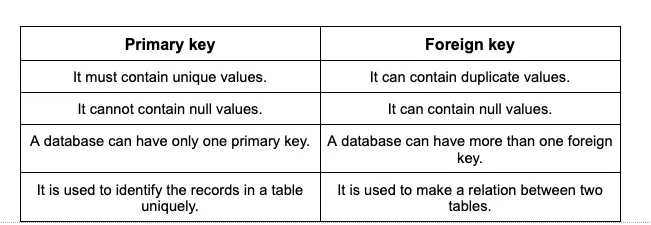

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/SQL/primary_vs_foreign.png')

# Part - 3

## Common Table Expressions

* You can create a temporary named result set that you can use in subsequent queries within the same session using Common Table Expressions (CTEs)

In [ ]:
query = """
WITH region_filtered AS (
  SELECT *
  FROM REGION
  WHERE regionid <= 5
)
SELECT *
FROM region_filtered;
"""
execute_query(query)

,regionid,region
0,1,Albany
1,2,Atlanta
2,3,BaltimoreWashington
3,4,Boise
4,5,Boston


## Join

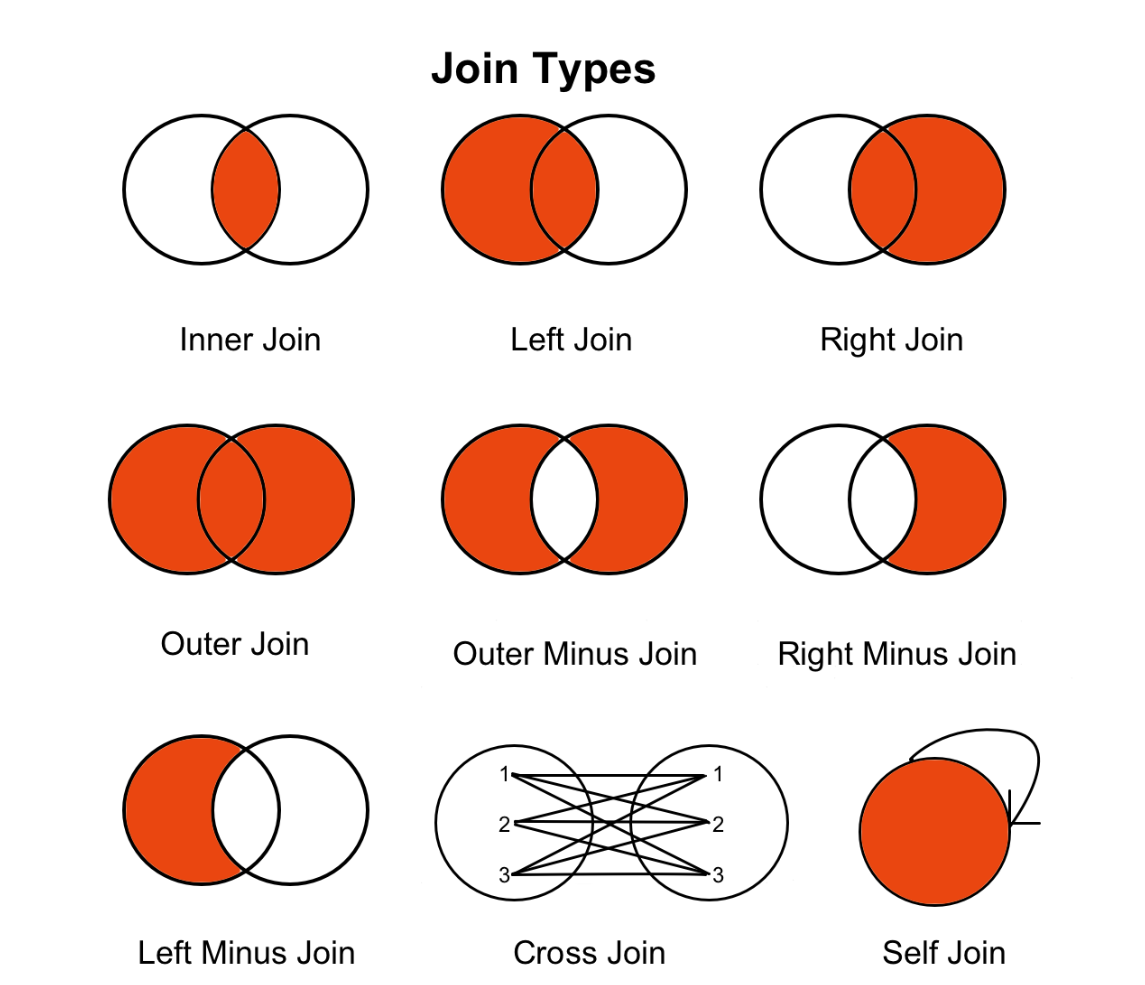

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/joins.png')

In [ ]:
## INNER JOIN
query = """
WITH REGION_FILTERED AS (
  SELECT *
  FROM REGION
  WHERE regionid <= 5
)
SELECT AVOCADO.avo_a, AVOCADO.avo_b, AVOCADO.regionid, REGION_FILTERED.region
FROM AVOCADO INNER JOIN REGION_FILTERED
ON AVOCADO.REGIONID = REGION_FILTERED.REGIONID;
"""
execute_query(query)

,avo_a,avo_b,regionid,region
0,0.00,94.73,1,Albany
1,0.00,162.87,1,Albany
2,0.00,245.71,1,Albany
3,0.00,252.98,1,Albany
4,0.00,374.18,1,Albany
...,...,...,...,...
1685,39970.65,346155.69,5,Boston
1686,40864.15,338301.37,5,Boston
1687,50889.62,594522.97,5,Boston
1688,83640.38,593329.02,5,Boston


In [ ]:
## LEFT JOIN
query = """
WITH REGION_FILTERED AS (
  SELECT *
  FROM REGION
  WHERE regionid <= 5
)
SELECT AVOCADO.avo_a, AVOCADO.avo_b, AVOCADO.regionid, REGION_FILTERED.region
FROM AVOCADO LEFT JOIN REGION_FILTERED
ON AVOCADO.REGIONID = REGION_FILTERED.REGIONID;
"""
execute_query(query)

,avo_a,avo_b,regionid,region
0,2819.50,28287.42,1,Albany
1,364302.39,23821.16,2,Atlanta
2,53987.31,552906.04,3,BaltimoreWashington
3,44562.12,24964.23,4,Boise
4,7193.87,396752.18,5,Boston
...,...,...,...,...
18244,78.95,148.37,50,None
18245,138.15,773.22,51,None
18246,121007.94,342853.10,52,None
18247,26996.28,77861.39,53,None


In [ ]:
## RIGHT JOIN
query = """
WITH REGION_FILTERED AS (
  SELECT *
  FROM REGION
  WHERE regionid <= 5
)
SELECT AVOCADO.avo_a, AVOCADO.avo_b, AVOCADO.regionid, REGION_FILTERED.region
FROM REGION_FILTERED LEFT JOIN AVOCADO 
ON REGION_FILTERED.REGIONID = AVOCADO.REGIONID;
"""
execute_query(query)

,avo_a,avo_b,regionid,region
0,0.00,94.73,1,Albany
1,0.00,162.87,1,Albany
2,0.00,245.71,1,Albany
3,0.00,252.98,1,Albany
4,0.00,374.18,1,Albany
...,...,...,...,...
1685,39970.65,346155.69,5,Boston
1686,40864.15,338301.37,5,Boston
1687,50889.62,594522.97,5,Boston
1688,83640.38,593329.02,5,Boston


In [ ]:
## FULL OUTER JOIN
query = """
WITH REGION_FILTERED AS (
  SELECT *
  FROM REGION
  WHERE regionid <= 5
)
SELECT AVOCADO.avo_a, AVOCADO.avo_b, AVOCADO.regionid, REGION_FILTERED.region
FROM AVOCADO LEFT JOIN REGION_FILTERED 
ON AVOCADO.REGIONID = REGION_FILTERED.REGIONID
UNION
SELECT AVOCADO.avo_a, AVOCADO.avo_b, AVOCADO.regionid, REGION_FILTERED.region
FROM REGION_FILTERED LEFT JOIN AVOCADO 
ON REGION_FILTERED.REGIONID = AVOCADO.REGIONID;
"""
execute_query(query)

,avo_a,avo_b,regionid,region
0,2819.50,28287.42,1,Albany
1,364302.39,23821.16,2,Atlanta
2,53987.31,552906.04,3,BaltimoreWashington
3,44562.12,24964.23,4,Boise
4,7193.87,396752.18,5,Boston
...,...,...,...,...
19934,39970.65,346155.69,5,Boston
19935,40864.15,338301.37,5,Boston
19936,50889.62,594522.97,5,Boston
19937,83640.38,593329.02,5,Boston


## Window Functions
* Window functions applies aggregate and ranking functions over a particular window(set of rows). OVER clause is used with window functions to define that window. OVER clause does two things : 
> * Partitions rows into form set of rows. (PARTITION BY clause is used) 
> * Orders rows within those partitions into a particular order. (ORDER BY clause is used) 

### Ranking Based

In [ ]:
query = """SELECT *, RANK() OVER (ORDER BY regionid DESC) as ranking
            FROM AVOCADO
            ORDER BY ranking
        """
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid,ranking
0,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,1,54,1
1,2015-01-04,1.64,6182.81,1561.30,2958.17,0.00,2,54,1
2,2015-01-11,0.92,584896.99,347125.63,129717.42,27944.07,1,54,1
3,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2,54,1
4,2015-01-18,0.80,729795.72,516446.41,128438.87,12473.14,1,54,1
...,...,...,...,...,...,...,...,...,...
18244,2018-03-11,1.68,2570.52,131.67,229.56,0.00,2,1,17912
18245,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,1,1,17912
18246,2018-03-18,1.66,3154.45,275.89,297.96,0.00,2,1,17912
18247,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,1,1,17912


### Percentile Based

In [ ]:
query = """SELECT *, NTILE(10) OVER (ORDER BY totalvol DESC) as percentile
            FROM AVOCADO
            ORDER BY percentile
        """
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid,percentile
0,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,1,52,1
1,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,1,52,1
2,2016-02-07,0.76,52288697.89,16573573.78,20470572.61,2546439.11,1,52,1
3,2017-05-07,1.09,47293921.60,17076650.82,13549102.59,863471.88,1,52,1
4,2016-05-08,0.82,46324529.70,14223304.98,17896391.60,1993645.36,1,52,1
...,...,...,...,...,...,...,...,...,...
18244,2016-10-02,1.49,472.82,10.50,18.99,0.00,2,25,10
18245,2015-07-12,2.05,419.98,0.00,63.42,0.00,2,50,10
18246,2016-10-30,1.58,385.55,8.13,47.42,0.00,2,25,10
18247,2015-01-04,1.73,379.82,0.00,59.82,0.00,2,6,10


### Row Based

In [ ]:
query = """SELECT *, ROW_NUMBER() OVER (ORDER BY regionid DESC) as ranking_position
            FROM AVOCADO
            ORDER BY ranking_position
        """
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid,ranking_position
0,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,1,54,1
1,2015-01-04,1.64,6182.81,1561.30,2958.17,0.00,2,54,2
2,2015-01-11,0.92,584896.99,347125.63,129717.42,27944.07,1,54,3
3,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2,54,4
4,2015-01-18,0.80,729795.72,516446.41,128438.87,12473.14,1,54,5
...,...,...,...,...,...,...,...,...,...
18244,2018-03-11,1.68,2570.52,131.67,229.56,0.00,2,1,18245
18245,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,1,1,18246
18246,2018-03-18,1.66,3154.45,275.89,297.96,0.00,2,1,18247
18247,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,1,1,18248


# Part - 4

## Aggregate Functions

* An aggregate function in SQL performs a calculation on multiple values and returns a single value. SQL provides many aggregate functions that include avg, count, sum, min, max, etc.
* We often use aggregate functions with the **GROUP BY** and **HAVING** clauses of the SELECT statement
* **Note:** An aggregate function ignores NULL values when it performs the calculation, except for the count function

### GROUP BY

* The SQL Group By statement uses the split-apply-combine strategy

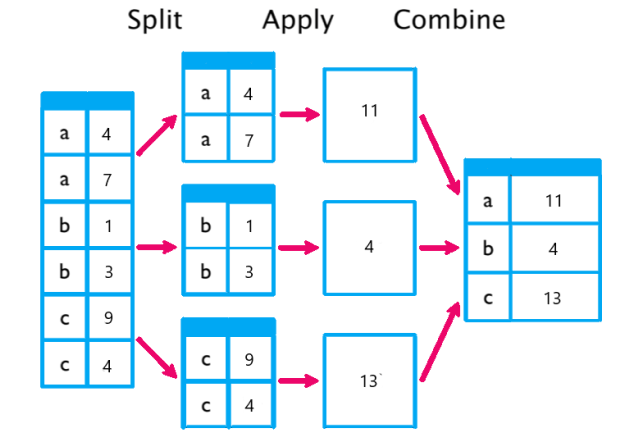

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/SQL/group_by_strategy.png')

### COUNT

In [ ]:
query = """SELECT COUNT(*)
            FROM AVOCADO
        """
execute_query(query)

,COUNT(*)
0,18249


In [ ]:
query = """SELECT COUNT(*), regionid
            FROM AVOCADO
            GROUP BY regionid
            ORDER BY regionid DESC
            LIMIT 5
        """
execute_query(query)

,COUNT(*),regionid
0,338,52


In [ ]:
query = """SELECT COUNT(*), regionid
            FROM AVOCADO
            GROUP BY regionid
            HAVING COUNT(*) != 338
            ORDER BY regionid DESC
        """
        # HAVING COUNT(*) != 338
execute_query(query)

,COUNT(*),regionid
0,335,54


### SUM

In [ ]:
query = """SELECT SUM(avgprice)
            FROM AVOCADO
        """
execute_query(query)

,SUM(avgprice)
0,25657.7


In [ ]:
query = """SELECT SUM(avgprice), type
            FROM AVOCADO
            GROUP BY type
        """
execute_query(query)

,SUM(avgprice),type
0,10568.27,1
1,15089.43,2


In [ ]:
query = """SELECT SUM(avgprice), regionid
            FROM AVOCADO
            GROUP BY regionid
            HAVING COUNT(regionid) != 338
        """
execute_query(query)

,SUM(avgprice),regionid
0,422.67,54


### AVG

In [ ]:
query = """SELECT AVG(avo_a)
            FROM AVOCADO
        """
execute_query(query)

,AVG(avo_a)
0,293008.424531


In [ ]:
query = """SELECT AVG(avo_a), type
            FROM AVOCADO
            GROUP BY type
        """
execute_query(query)

,AVG(avo_a),type
0,578611.649925,1
1,7311.281600,2


In [ ]:
query = """SELECT AVG(avo_a), regionid
            FROM AVOCADO
            GROUP BY regionid
            HAVING COUNT(regionid) != 338
        """
execute_query(query)

,AVG(avo_a),regionid
0,250977.271194,54


### MIN

In [8]:
query = """SELECT MIN(avo_b)
            FROM AVOCADO
        """
execute_query(query)

,MIN(avo_b)
0,0.0


In [9]:
query = """SELECT MIN(avo_b), type
            FROM AVOCADO
            GROUP BY type
        """
execute_query(query)

,MIN(avo_b),type
0,1518.0,1
1,0.0,2


In [10]:
query = """SELECT MIN(avo_b), regionid
            FROM AVOCADO
            GROUP BY regionid
            HAVING COUNT(regionid) != 338
        """
execute_query(query)

,MIN(avo_b),regionid
0,935.45,54


### MAX

In [5]:
query = """SELECT MAX(avo_c)
            FROM AVOCADO
        """
execute_query(query)

,MAX(avo_c)
0,2546439.11


In [6]:
query = """SELECT MAX(avo_c), type
            FROM AVOCADO
            GROUP BY type
        """
execute_query(query)

,MAX(avo_c),type
0,2546439.11,1
1,26765.78,2


In [7]:
query = """SELECT MAX(avo_c), regionid
            FROM AVOCADO
            GROUP BY regionid
            HAVING COUNT(regionid) != 338
        """
execute_query(query)

,MAX(avo_c),regionid
0,74916.26,54


## Sub-Queries

* A Subquery or Inner query or a Nested query is a query within another SQL query and embedded within clauses, most commonly in the WHERE clause. It is used to return data from a table, and this data will be used in the main query as a condition to further restrict the data to be retrieved.

* Subqueries can be used with the SELECT, INSERT, UPDATE, and DELETE statements along with the operators like =, <, >, >=, <=, IN, BETWEEN

In [18]:
# Return the table where avg of avo_a per regionid is greater than 240000
query = """SELECT * 
   FROM AVOCADO 
   WHERE regionid IN (SELECT regionid
      FROM AVOCADO 
      GROUP BY regionid
      HAVING AVG(avo_a) > 240000) ;
      """
execute_query(query)

,date,avgprice,totalvol,avo_a,avo_b,avo_c,type,regionid
0,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,1,7
1,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,1,12
2,2015-01-04,1.02,3382800.12,467259.47,2059657.71,318102.38,1,16
3,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,1,19
4,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,1,23
...,...,...,...,...,...,...,...,...
4386,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,2,46
4387,2018-03-25,1.45,121917.39,1929.39,18391.86,110.05,2,47
4388,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,2,52
4389,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,2,53
